# Исследование базы данных с информацией о венчурных фондах и инвестициях в компании-стартапы

У нас есть база данных, основанная на датасете Startup Investments, опубликованном на платформе для соревнований по исследованию данных Kaggle. База данных хранит информацию о венчурных фондах и инвестициях в компании-стартапы. 

База данных включает в себя 7 таблиц с информацией о 
- покупках одних компаний другими (таблица acquisition), 
- компаниях-стартапах (company),
- уровне образования сотрудников компаний (education),
- венчурных фондах (fund),
- раундах инвестиций (funding_round),
- инвестициях венчурных фондов в компании-стартапы (investment), 
- сотрудниках компаний-стартапов (people).

Цель проекта - проанализировать таблицу и ответить на вопросы, написав запросы к базе. 

#### Задача 1

Посчитайте, сколько компаний закрылось.

In [ ]:
SELECT COUNT(id)
FROM company
WHERE status = 'closed';

Вывод:

2584

#### Задача 2

Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total.

In [ ]:
SELECT funding_total
FROM company
WHERE category_code = 'news'
    AND country_code = 'USA'
ORDER BY funding_total DESC;

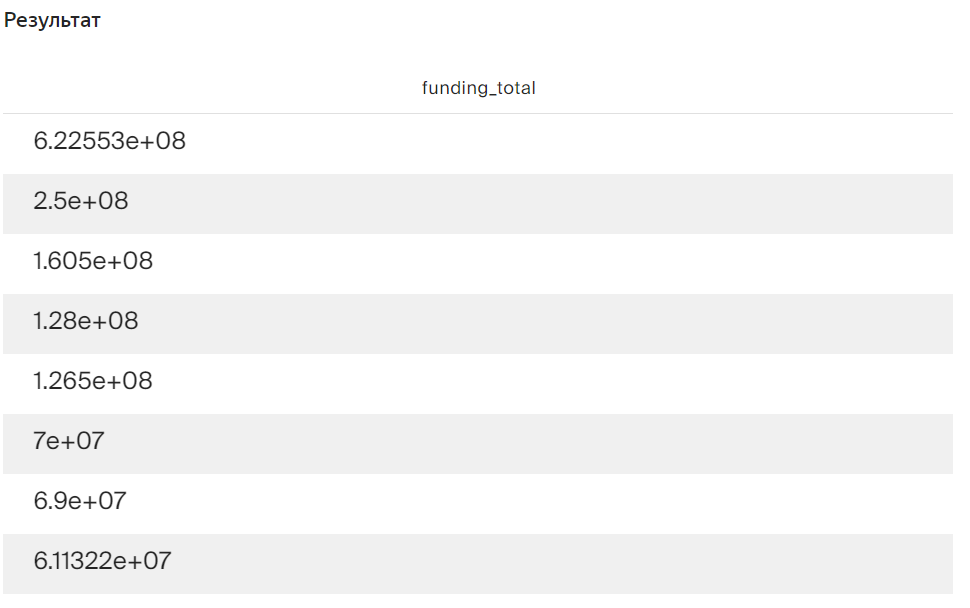

...

#### Задача 3

Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
AND CAST (acquired_at AS date) BETWEEN '2011-01-01' AND '2013-12-31';

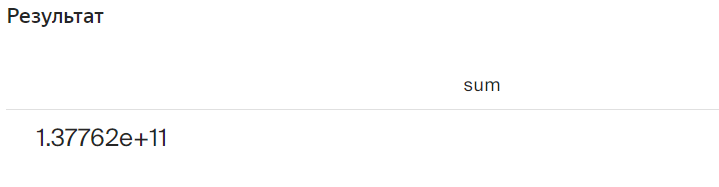

#### Задача 4

Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT first_name,
       last_name,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%';

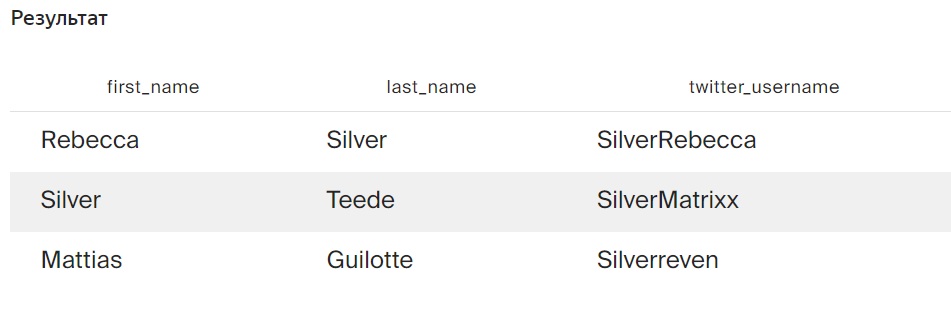

#### Задача 5

Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
    AND last_name LIKE 'K%';

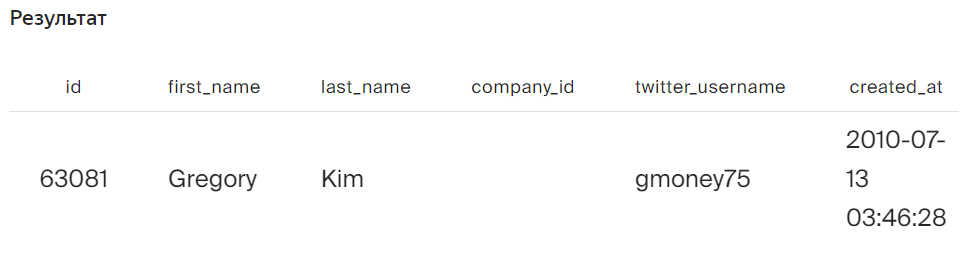

#### Задача 6

Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT country_code,
       SUM(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC;

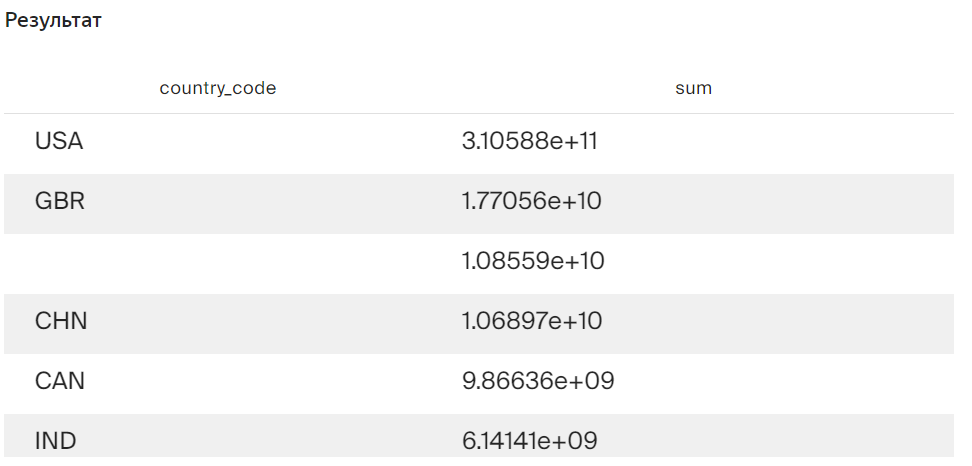

...

#### Задача 7

Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.

Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT CAST (funded_at AS date),
       MIN(raised_amount),
       MAX(raised_amount)
FROM funding_round
GROUP BY CAST (funded_at AS date)
HAVING MIN(raised_amount) <> 0
    AND MIN(raised_amount) <> MAX(raised_amount);

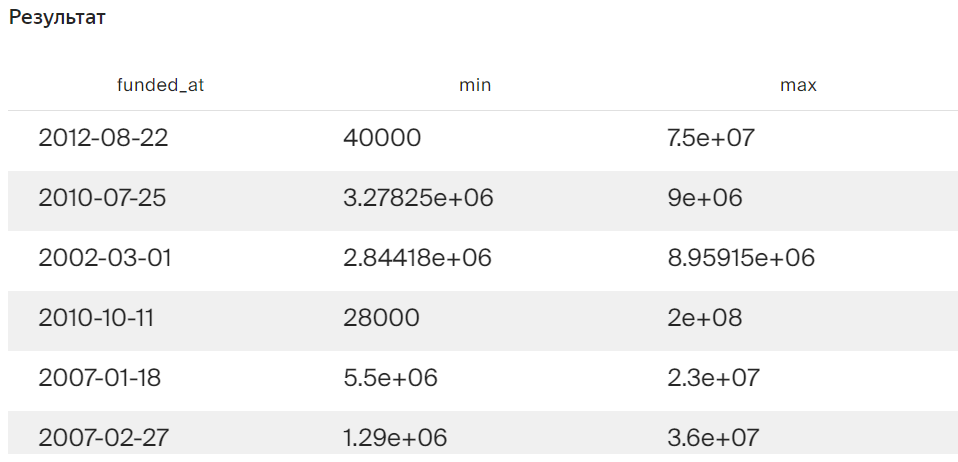

...

#### Задача 8

Создайте поле с категориями:

- Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
- Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
- Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.

Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT *,
       CASE
           WHEN invested_companies >= 100 THEN 'high_activity'
           WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
           WHEN invested_companies < 20 THEN 'low_activity'
        END
FROM fund;

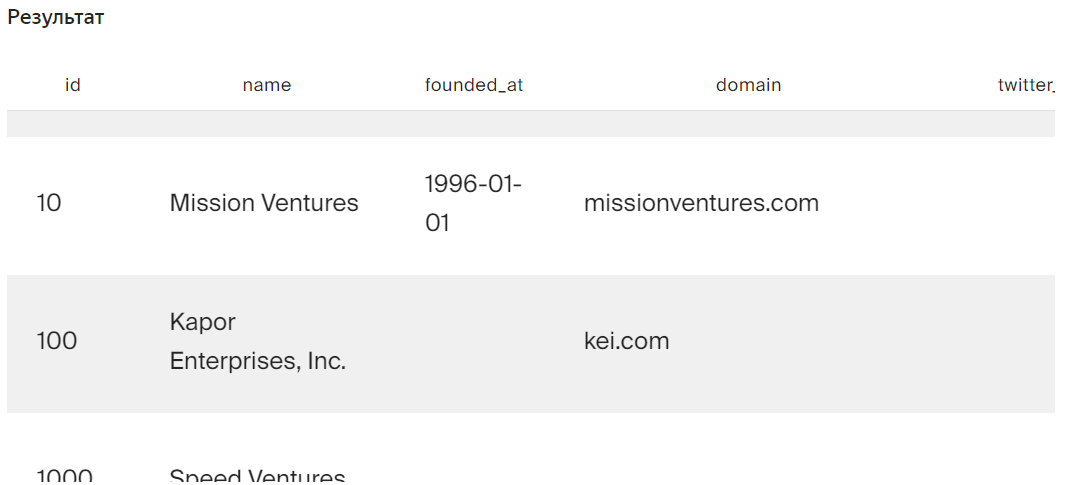

...

#### Задача 9


Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
SELECT CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       ROUND(AVG(investment_rounds))
FROM fund
GROUP BY activity
ORDER BY ROUND(AVG(investment_rounds));

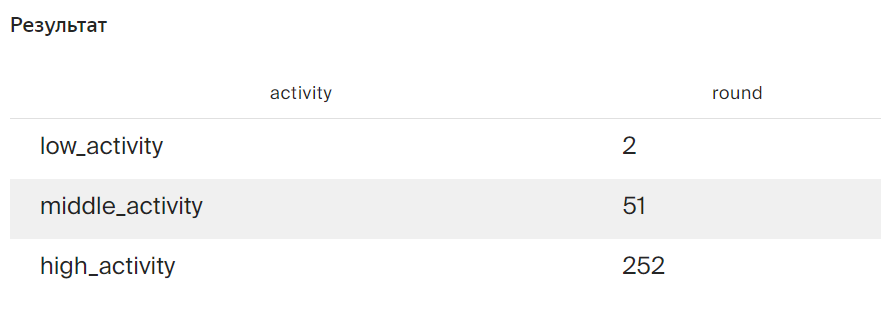

#### Задача 10

Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы.

Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. 

Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.

In [ ]:
SELECT country_code,
       MIN(invested_companies),
       MAX(invested_companies),
       AVG(invested_companies)
FROM fund
WHERE CAST (founded_at AS date) BETWEEN '2010-01-01' AND '2012-12-31'
GROUP BY country_code
HAVING MIN(invested_companies) <> 0
ORDER BY AVG(invested_companies) DESC, country_code
LIMIT 10;

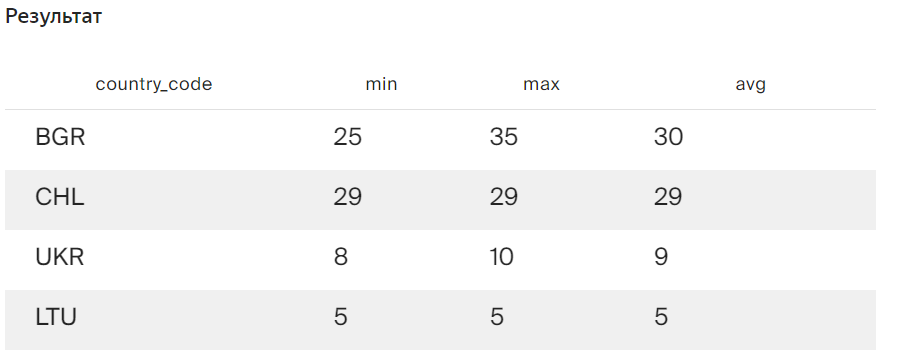

...

#### Задача 11 

Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT p.first_name,
       p.last_name,
       e.instituition
FROM people AS p
LEFT JOIN education AS e ON p.id=e.person_id;

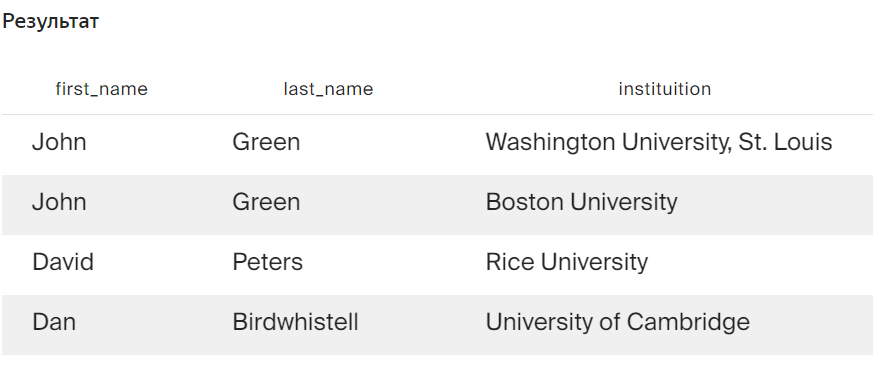

...

#### Задача 12

Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name,
       COUNT(DISTINCT e.instituition)
FROM company AS c
JOIN people as p ON c.id=p.company_id
JOIN education as e ON p.id=e.person_id
GROUP BY c.name
ORDER BY COUNT(DISTINCT e.instituition) DESC
LIMIT 5;

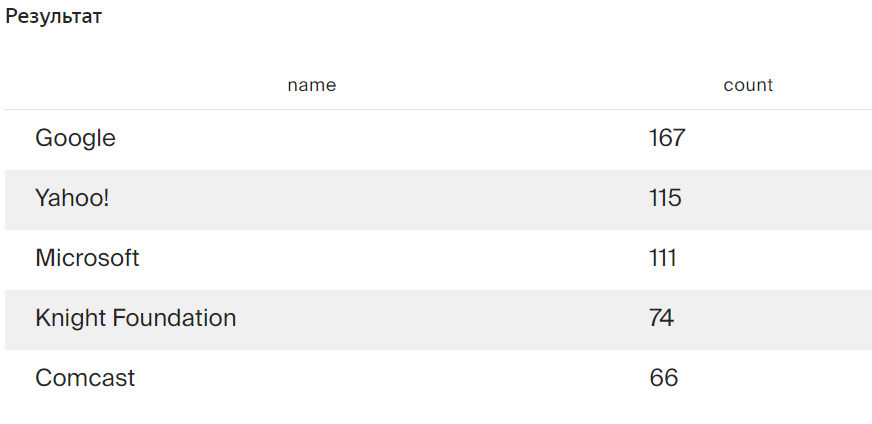

#### Задача 13

Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
SELECT DISTINCT c.name
FROM company as c
JOIN funding_round AS fr ON c.id=fr.company_id
WHERE fr.is_first_round = 1
AND fr.is_last_round = 1
AND c.status = 'closed';

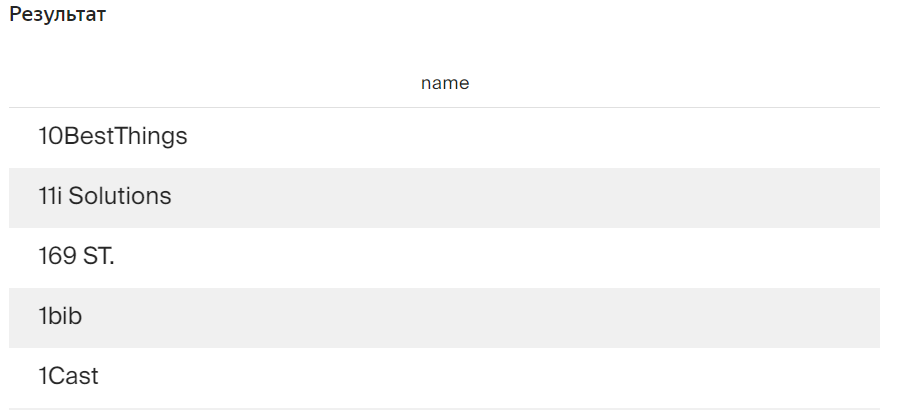

...

#### Задача 14

Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
SELECT p.id
FROM people as p
WHERE company_id IN 
# компании, отобранные в предыдущем задании
(SELECT DISTINCT C.id
FROM company as c
JOIN funding_round AS fr ON c.id=fr.company_id
WHERE fr.is_first_round = 1
AND fr.is_last_round = 1
AND c.status = 'closed');

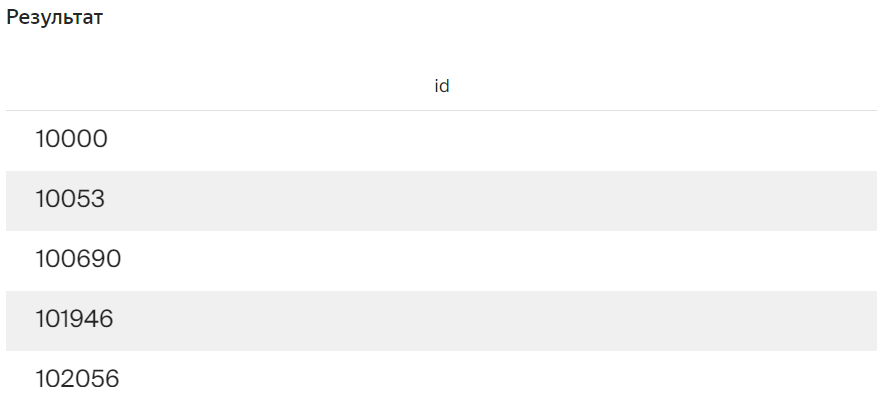

...

#### Задача 15 

Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
SELECT DISTINCT p.id,
       e.instituition
FROM people as p
JOIN education AS e ON p.id=e.person_id
WHERE p.company_id IN 
#компании, отобранные в предыдущем задании
    (SELECT DISTINCT C.id
    FROM company as c
    JOIN funding_round AS fr ON c.id=fr.company_id
    WHERE fr.is_first_round = 1
    AND fr.is_last_round = 1
    AND c.status = 'closed');

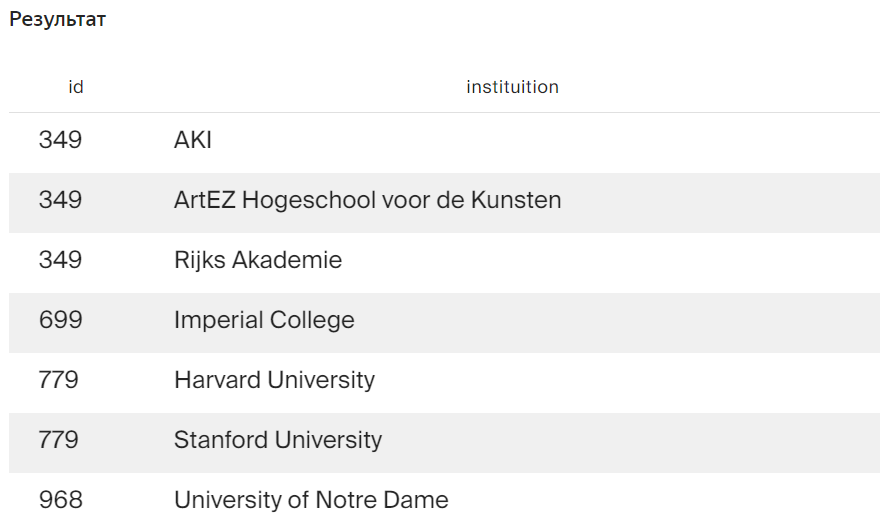

...

#### Задача 16

Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
SELECT p.id,
       COUNT(e.instituition)
FROM people as p
JOIN education AS e ON p.id=e.person_id
WHERE p.company_id IN 
# компании, отобранные в предыдущем задании
    (SELECT DISTINCT C.id
    FROM company as c
    JOIN funding_round AS fr ON c.id=fr.company_id
    WHERE fr.is_first_round = 1
    AND fr.is_last_round = 1
    AND c.status = 'closed')
GROUP BY p.id;

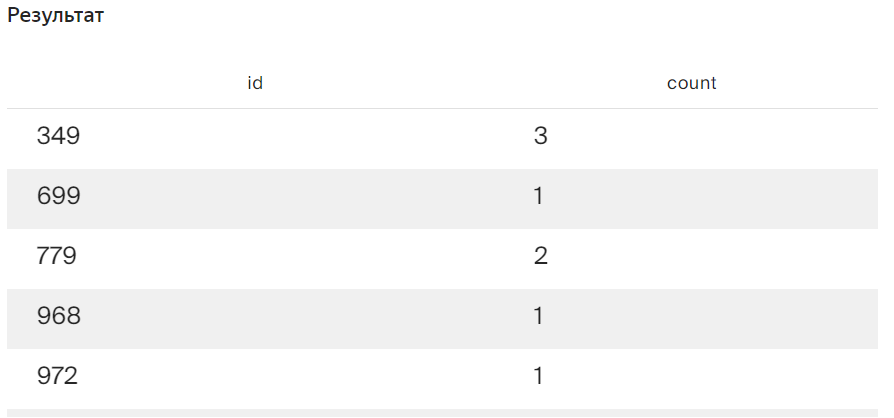

...

#### Задача 17

Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
SELECT AVG(t.all_instituition)
FROM (SELECT p.id,
     COUNT (e.instituition) AS all_instituition
FROM people AS p
LEFT JOIN education AS e ON e.person_id=p.id
WHERE p.company_id in (
    SELECT DISTINCT c.id
    FROM company AS c
    LEFT JOIN funding_round AS f ON c.id=f.company_id
    
    WHERE c.status='closed' 
        AND f.is_first_round=1
        AND f.is_last_round=1
)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) > 0) AS t;

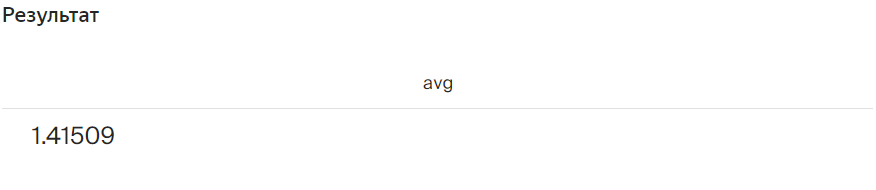

#### Задача 18

Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.

*(сервис, запрещённый на территории РФ)

In [ ]:
SELECT AVG(t.all_instituition)
FROM (SELECT p.id,
     COUNT (e.instituition) AS all_instituition
FROM people AS p
LEFT JOIN education AS e ON e.person_id=p.id
WHERE p.company_id in (
    SELECT DISTINCT c.id
    FROM company AS c
    WHERE c.name = 'Facebook'
)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) > 0) AS t;

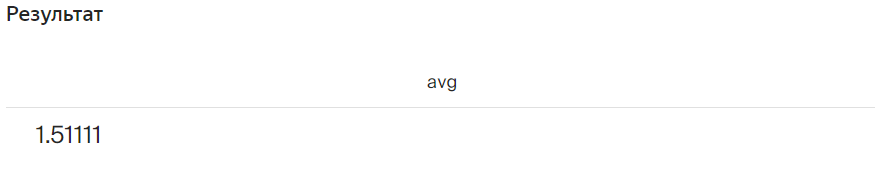

#### Задача 19

Составьте таблицу из полей:

- name_of_fund — название фонда;
- name_of_company — название компании;
- amount — сумма инвестиций, которую привлекла компания в раунде.

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund, 
       c.name AS name_of_company, 
         fr.raised_amount AS amount
FROM investment AS i 
LEFT JOIN company AS c ON c.id = i.company_id
LEFT JOIN fund AS f ON f.id = i.fund_id
INNER JOIN (SELECT * 
           FROM funding_round
           WHERE EXTRACT(YEAR FROM funded_at) BETWEEN 2012 AND 2013) AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6;

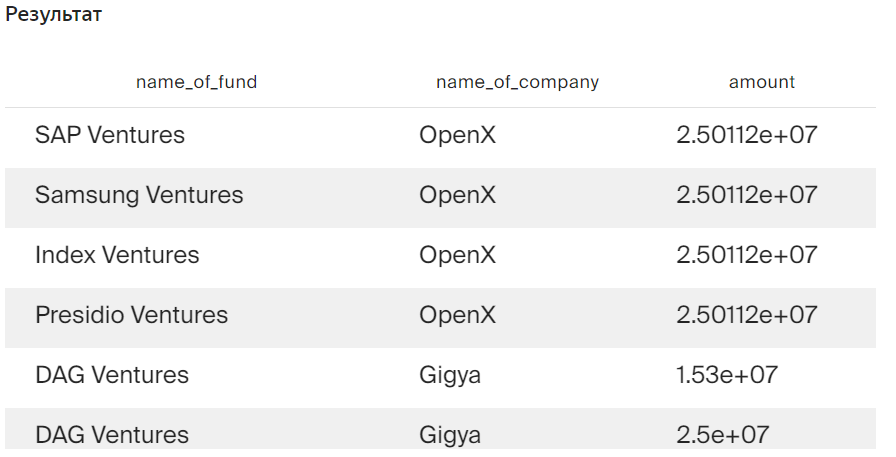

...

#### Задача 20

Выгрузите таблицу, в которой будут такие поля:

- название компании-покупателя;
- сумма сделки;
- название компании, которую купили;
- сумма инвестиций, вложенных в купленную компанию;
- доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы. 

Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
SELECT c1.name as acquiring_company,
       a.price_amount,
       c2.name as acquired_company,
       c2.funding_total,
       ROUND(a.price_amount / c2.funding_total)
FROM acquisition as a    
LEFT JOIN company as c1 on a.acquiring_company_id=c1.id
LEFT JOIN company as c2 on a.acquired_company_id=c2.id
WHERE a.price_amount > 0
    AND c2.funding_total > 0
ORDER BY a.price_amount DESC, acquired_company
LIMIT 10; 

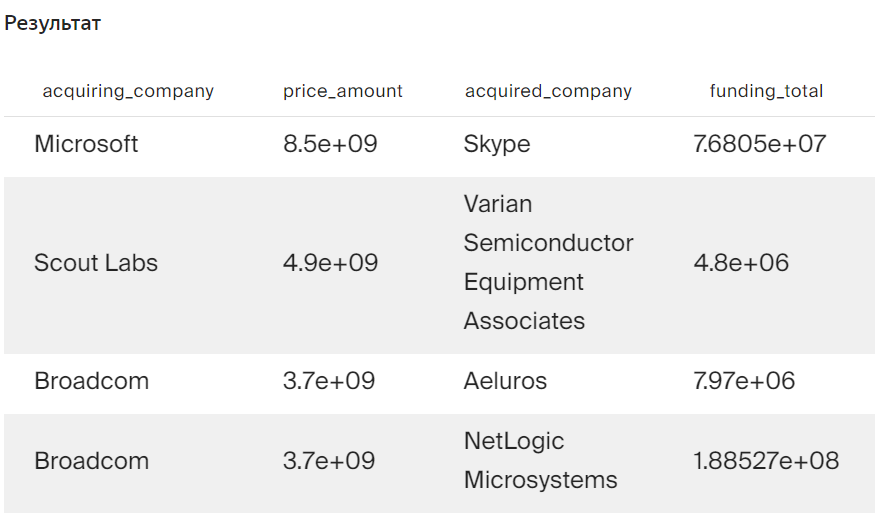

...

#### Задача 21

Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT c.name,
       EXTRACT (MONTH FROM CAST (fr.funded_at AS timestamp))
FROM company AS c
JOIN funding_round AS fr ON c.id=fr.company_id
WHERE c.category_code = 'social'
AND EXTRACT (YEAR FROM CAST (fr.funded_at AS timestamp)) BETWEEN 2010 AND 2013
AND fr.raised_amount > 0;

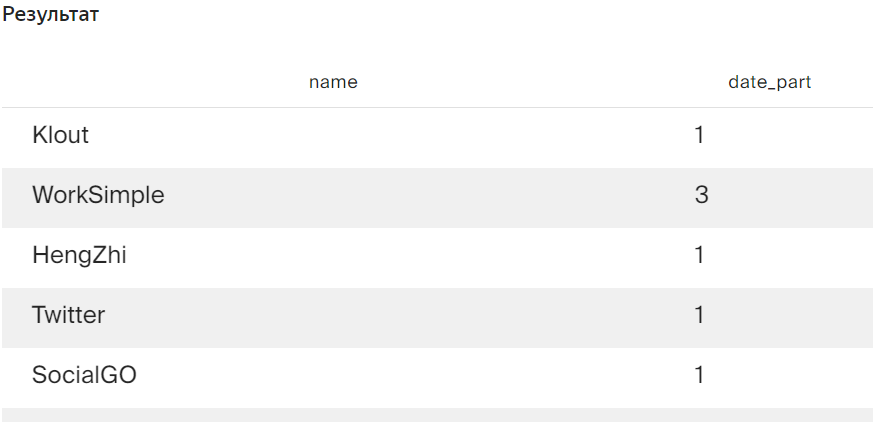

...

#### Задача 22


Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
- номер месяца, в котором проходили раунды;
- количество уникальных названий фондов из США, которые инвестировали в этом месяце;
- количество компаний, купленных за этот месяц;
- общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH
#кол-во уникальных фондов в США, к-ые инвестировали в этом месяце
unique_funds AS 
(SELECT EXTRACT (MONTH FROM fr.funded_at) as month,
        COUNT(DISTINCT f.name) as count_funds
FROM fund as f
LEFT JOIN investment as i ON f.id=i.fund_id
LEFT JOIN funding_round AS fr ON i.funding_round_id=fr.id
WHERE f.country_code = 'USA'
AND fr.funded_at BETWEEN '2010-01-01' AND '2013-12-31'
GROUP BY month),
# кол-во компаний, купленных в этом месяце и общая сумма сделок
acquired_companies AS 
(SELECT EXTRACT (MONTH FROM a.acquired_at) as month,
        COUNT(a.acquired_company_id) as count_companies,
        SUM(a.price_amount) as amount
 FROM acquisition AS a
 WHERE a.acquired_at BETWEEN '2010-01-01' AND '2013-12-31'
 GROUP BY month

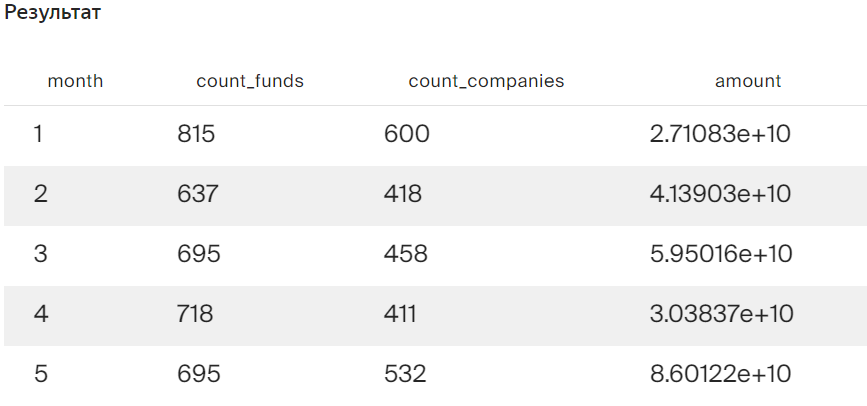

...

#### Задача 23 

Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH 
y11 AS (SELECT country_code,
        AVG(funding_total)
        FROM company
        WHERE EXTRACT (YEAR FROM founded_at) = 2011
        GROUP BY country_code),
y12 AS (SELECT country_code,
        AVG(funding_total)
        FROM company
        WHERE EXTRACT (YEAR FROM founded_at) = 2012
        GROUP BY country_code),
y13 AS (SELECT country_code,
        AVG(funding_total)
        FROM company
        WHERE EXTRACT (YEAR FROM founded_at) = 2013
        GROUP BY country_code)
SELECT y11.country_code,
       y11.avg AS year_2011,
       y12.avg AS year_2012,
       y13.avg AS year_2013
FROM y11
JOIN y12 ON y11.country_code=y12.country_code
JOIN y13 ON y12.country_code=y13.country_code
ORDER BY y11.avg DESC;

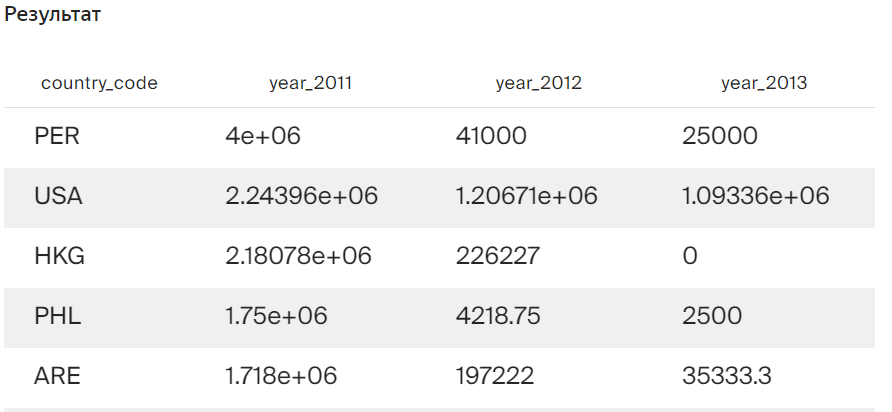

...